
# Churn Analysis Project

This notebook is part of the **Churn Analysis** project. The goal of this project is to analyze customer churn behavior and predict the likelihood of customers leaving using machine learning techniques.

## Table of Contents:
1. Importing Libraries
2. Loading and Inspecting the Data
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Model Building
6. Model Evaluation
7. Conclusion
8. Saving and Loading the Model


# Churn analysis

### Import the necessary libraries

### 1. Importing Libraries

Import the required libraries for data manipulation, visualization, and machine learning.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import joblib

### Load the Telco Customer Churn Dataset

### 2. Loading the Data

We load the dataset and inspect its structure to get an overview of the data.

In [31]:

Data = pd.read_csv('/Users/jagrutigodambe/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
Data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##  Data Preprocessing

 a) Handle Missing Values:

### 3. Data Preprocessing

We check for missing values, handle categorical variables, and scale numerical features to prepare the data for modeling.

In [35]:
# Check for missing values
print(Data.isnull().sum())

# Drop rows where 'TotalCharges' is missing
Data = Data[Data['TotalCharges'] != ' ']

# Convert 'TotalCharges' to a numeric column
Data['TotalCharges'] = pd.to_numeric(Data['TotalCharges'])


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


b) Convert Categorical Variables:

In [36]:
# Drop the 'customerID' column as it is not useful for prediction
Data = Data.drop(columns=['customerID'])

# Convert binary categorical variables using LabelEncoder
label_encoder = LabelEncoder()
Data['Churn'] = label_encoder.fit_transform(Data['Churn'])  # Yes/No -> 1/0

# Perform one-hot encoding on categorical features
Data = pd.get_dummies(Data, drop_first=True)


c) Feature Scaling:

In [37]:
scaler = StandardScaler()
Data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(Data[['tenure', 'MonthlyCharges', 'TotalCharges']])


## Exploratory Data Analysis (EDA)

a) Churn Distribution:

### 4. Exploratory Data Analysis (EDA)

We explore the data visually to understand the distributions and relationships between variables.

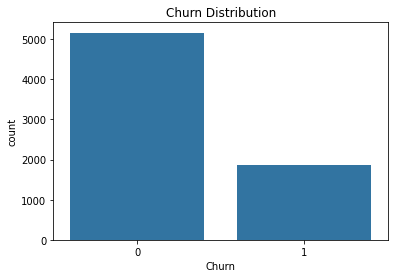

In [38]:
sns.countplot(x='Churn', data=Data)
plt.title('Churn Distribution')
plt.show()

b) Correlation Matrix:

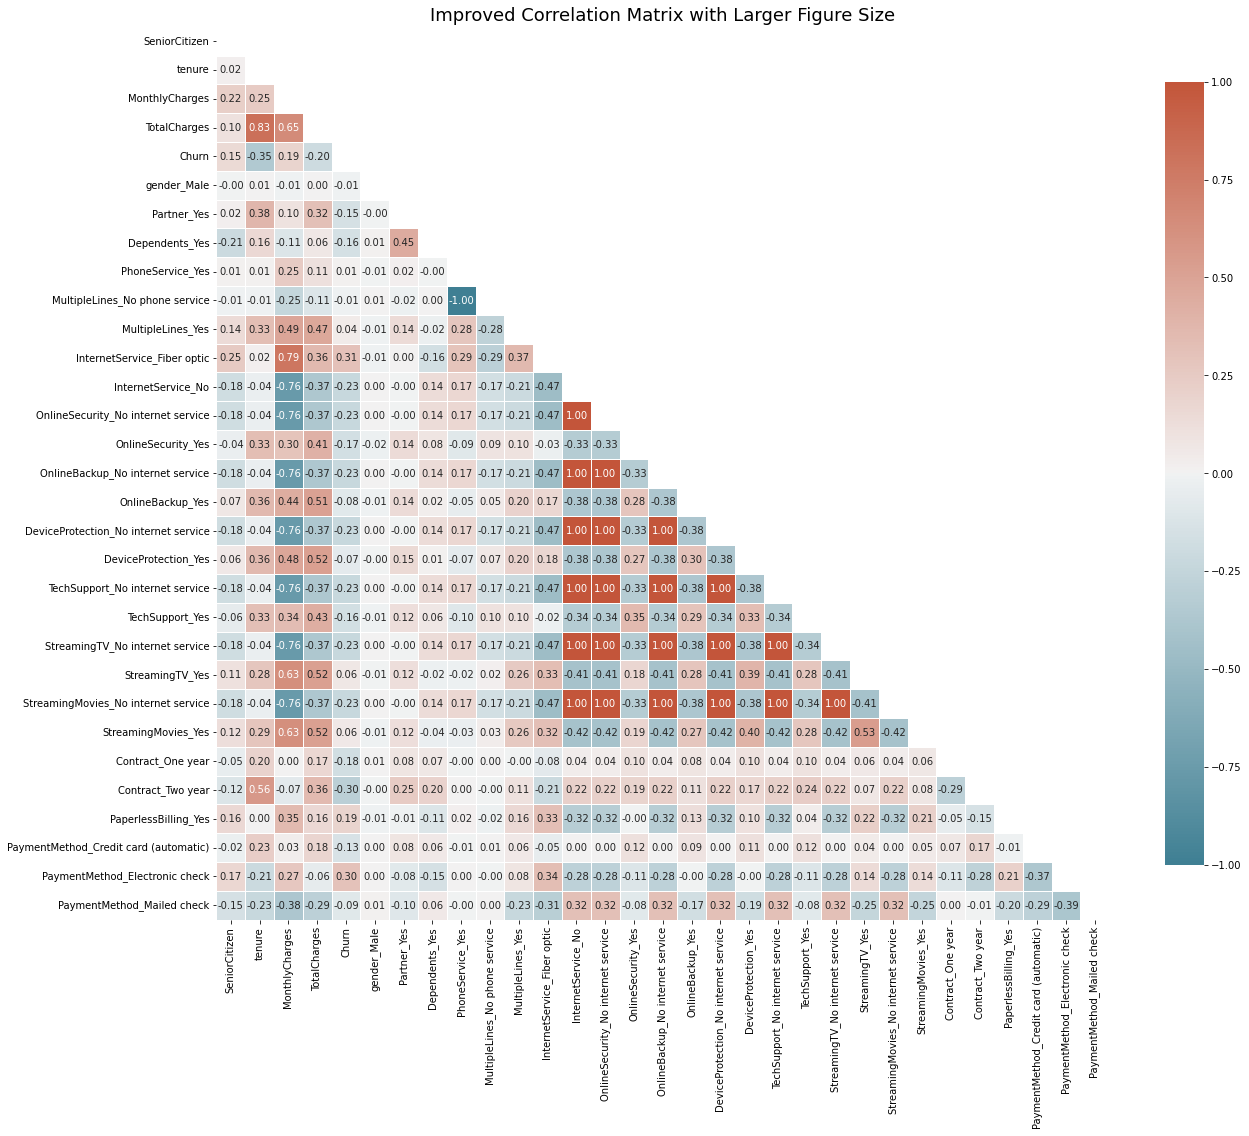

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a larger figure size
plt.figure(figsize=(20, 18))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(Data.corr(), dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask, ensuring only the lower triangle is visible
sns.heatmap(Data.corr(), mask=mask, cmap=cmap, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8}, square=True)

# Add a title
plt.title('Improved Correlation Matrix with Larger Figure Size', fontsize=18)

# Show the plot
plt.show()


c) Boxplot for MonthlyCharges vs Churn:

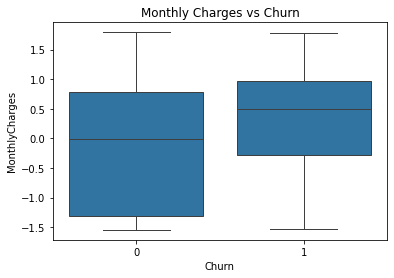

In [40]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=Data)
plt.title('Monthly Charges vs Churn')
plt.show()

## Split the Dataset into Training and Testing Sets

In [41]:
# Separate the features and target variable
X = Data.drop(columns=['Churn'])
y = Data['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building

 Logistic Regression:

### 5. Model Building

We train machine learning models (Logistic Regression and Random Forest) to predict customer churn.

In [42]:
# Build and train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Print the accuracy and classification report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7882018479033405
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Random Forest Classifier:

In [43]:
# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Print the accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7846481876332623
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Model Evaluation

a) Confusion Matrix:

### 6. Model Evaluation

We evaluate model performance using accuracy, precision, recall, and confusion matrix.

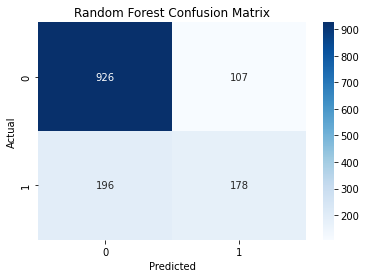

In [44]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


ROC Curve:

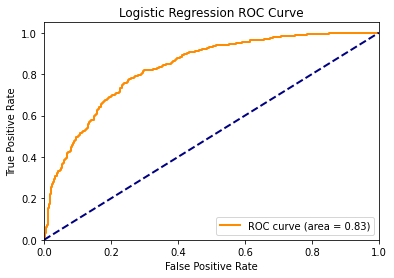

In [45]:
# ROC Curve for Logistic Regression
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()


 ## Feature Importance (Random Forest):

                                  Feature  Importance
3                            TotalCharges    0.193409
2                          MonthlyCharges    0.169758
1                                  tenure    0.167572
10            InternetService_Fiber optic    0.039999
28         PaymentMethod_Electronic check    0.035016
13                     OnlineSecurity_Yes    0.028905
25                      Contract_Two year    0.028618
4                             gender_Male    0.026971
19                        TechSupport_Yes    0.025829
26                   PaperlessBilling_Yes    0.025044
24                      Contract_One year    0.024433
5                             Partner_Yes    0.023768
0                           SeniorCitizen    0.021641
15                       OnlineBackup_Yes    0.021422
9                       MultipleLines_Yes    0.019980
6                          Dependents_Yes    0.019294
17                   DeviceProtection_Yes    0.019221
23                    Stream

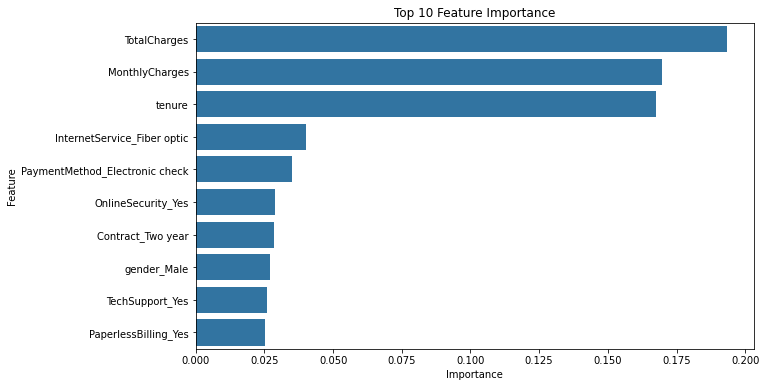

In [46]:
# Get feature importance from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importance')
plt.show()
